# Collating Results

<br><br>
___
### Cleaning Data

In [ ]:
# !git clone https://github.com/Sakib56/MInf-2.0-DeepFake-Detection.git
# %cd "/content/MInf-2.0-DeepFake-Detection"

In [ ]:
from scipy.stats import ttest_ind, ttest_rel
import matplotlib.pyplot as plt
from scipy.stats import t
import seaborn as sns
import pandas as pd
import numpy as np
import os

sns.set()
plt.rc("font", family="serif")

# os.listdir(".")

In [ ]:
def get_metric_from_file(fpath, metric="auc"):
    with open(fpath, "r") as f:
        f.readline()  # (experiment_name, model_name, test_dataset, fpath)
        auc = f.readline()
        f1 = f.readline()
        prec = f.readline()
        recall = f.readline()
        metrics = {
            "auc": auc,
            "f1": f1,
            "prec": prec,
            "recall": recall,
        }
    chosen_metric = metrics[metric.lower()]
    return float(chosen_metric.strip().split("=")[-1])


get_all_metrics = lambda t: [
    get_metric_from_file(t, "auc"),
    get_metric_from_file(t, "f1"),
    get_metric_from_file(t, "prec"),
    get_metric_from_file(t, "recall"),
]

COL_HDRS = ["Model", "AUC", "F1", "Precision", "Recall"]


def create_pd(model_results_txts, model_results_dir):
    model_results_txts = [
        f"{model_results_dir}{f}" for f in os.listdir(model_results_dir) if ".txt" in f
    ]
    tuple_list = [
        tuple([v.split("/")[-1].replace(".txt", "")] + get_all_metrics(v))
        for v in model_results_txts
    ]
    return pd.DataFrame(tuple_list, columns=COL_HDRS)


def categorise_names(t):
    tstst = t[-1].lower()
    if "run" in tstst:
        # cdfv2runningavg -> raeonCDFv2avg
        t[-1] = "rae" + t[-1].replace("running", "")
    if "on" in tstst:
        # raeondfavg -> raeDFavg
        t[-1] = t[-1].replace("on", "")
    if "cdfv2" in tstst:
        # cdfv2avg -> AVG
        t[-1] = t[-1].lower().replace("cdfv2", "").upper()
        # cdfv2runningavg -> raeAVG
        t[-1] = t[-1].replace("RAE", "rae")
    if t[-1] == "AVG" or t[-1] == "RND":
        # AVG -> CDFv2avg
        t[-1] = "CDFv2" + t[-1].lower()
        # print(tstst, t[-1])
    if t[-2] == "AVG" or t[-2] == "RND":
        t[-2] = "CDFv2" + t[-2].lower()

    return t


def welch_ttest(x1, x2, alternative):
    n1 = x1.size
    n2 = x2.size
    m1 = np.mean(x1)
    m2 = np.mean(x2)
    v1 = np.var(x1, ddof=1)
    v2 = np.var(x2, ddof=1)
    tstat = (m1 - m2) / np.sqrt(v1 / n1 + v2 / n2)
    df = (v1 / n1 + v2 / n2) ** 2 / (
        v1**2 / (n1**2 * (n1 - 1)) + v2**2 / (n2**2 * (n2 - 1))
    )
    if alternative == "equal":
        p = 2 * t.cdf(-abs(tstat), df)
    if alternative == "lesser":
        p = t.cdf(tstat, df)
    if alternative == "greater":
        p = 1 - t.cdf(tstat, df)
    return tstat, df, p


def clean_latex(df):
    _df = df.copy()
    _df.loc[_df["Testset"] == "DFDB", "is_RAE"] = "-"
    _df.loc[_df["Testset"] == "DFDB", "is_AVG_Testset"] = "-"

    _df.loc[
        (_df["Trainset"] == "F2F") & (_df["Model_Name"] == "Meso4"), 
        "is_AVG_Trainset"] = "-"

    _df.loc[
        (_df["Trainset"] == "F2F") & (_df["Model_Name"] == "MesoInception"),
        "is_AVG_Trainset"] = "-"

    _df.loc[
        (_df["Trainset"] == "DF") & (_df["Model_Name"] == "Meso4"),
        "is_AVG_Trainset"] = "-"

    _df.loc[
        (_df["Trainset"] == "DF") & (_df["Model_Name"] == "MesoInception"),
        "is_AVG_Trainset"] = "-"

    latex_str = _df.to_latex(
        label="tab:best_models",
        column_format="c" * 10,
        index=True,
    )

    latex_str = latex_str.replace("Model\\_Name", "Model")
    latex_str = latex_str.replace("is\\_RAE", "Evaluation Method ( 0=SE, 1=RAE )")
    latex_str = latex_str.replace("is\\_AVG\\_Trainset", "Trainset Pre-Processing ( 0=RF, 1=AF )")
    latex_str = latex_str.replace("is\\_AVG\\_Testset", "Testset Pre-Processing ( 0=RF, 1=AF )")

    latex_str = latex_str.replace("Model_Name", "Model")
    latex_str = latex_str.replace("is_RAE", "Evaluation Method ( 0=SE, 1=RAE )")
    latex_str = latex_str.replace("is_AVG_Trainset", "Trainset Pre-Processing ( 0=RF, 1=AF )")
    latex_str = latex_str.replace("is_AVG_Testset", "Testset Pre-Processing ( 0=RF, 1=AF )")
    return latex_str


In [ ]:
# _df = df.copy()
# _df.loc[_df['Testset'] == 'DFDB', 'is_RAE'] = "-"
# _df.loc[_df['Testset'] == 'DFDB', 'is_AVG_Testset'] = "-"

# _df.loc[(_df['Trainset'] == 'F2F') & (_df['Model_Name'] == 'Meso4'), 'is_AVG_Trainset'] = "-"
# _df.loc[(_df['Trainset'] == 'F2F') & (_df['Model_Name'] == 'MesoInception'), 'is_AVG_Trainset'] = "-"

# _df.loc[(_df['Trainset'] == 'DF') & (_df['Model_Name'] == 'Meso4'), 'is_AVG_Trainset'] = "-"
# _df.loc[(_df['Trainset'] == 'DF') & (_df['Model_Name'] == 'MesoInception'), 'is_AVG_Trainset'] = "-"
# _df[:10]
# # (df["B"] > 50) & (df["C"] == 900)


In [ ]:
baseline_results_dir = "./_BASELINE_TESTS/Results/"
oc_fakedect1_results_dir = "./_TRAINING/OC-FakeDect-Implementation/Results/"
vit_results_dir = "./_TRAINING/ViT/Results/"


In [ ]:
baseline_results_txts = [
    f"{baseline_results_dir}{f}"
    for f in os.listdir(baseline_results_dir)
    if ".txt" in f
]
oc_fakedect1_results_txts = [
    f"{oc_fakedect1_results_dir}{f}"
    for f in os.listdir(oc_fakedect1_results_dir)
    if ".txt" in f
]
vit_results_txts = [
    f"{oc_fakedect1_results_dir}{f}" 
    for f in os.listdir(vit_results_dir) 
    if ".txt" in f
]


In [ ]:
vit_df = create_pd(vit_results_txts, vit_results_dir)
baseline_df = create_pd(baseline_results_txts, baseline_results_dir)
oc_fakedect1_df = create_pd(oc_fakedect1_results_txts, oc_fakedect1_results_dir)
df = pd.concat([vit_df, baseline_df, oc_fakedect1_df])
df = df.sort_values(by=["AUC", "F1", "Precision", "Recall"], ascending=[False] * 4)


In [ ]:
# Find best
model_names_split = [(m, m.split("_")) for m in df["Model"]]
remove_list = [m for m, ms in model_names_split if len(ms) > 3]
print("Remove Rows", str(remove_list).replace(",", ",\n"), sep="\n")
df = df[~df["Model"].isin(remove_list)]

In [ ]:
set([m.split("_")[0] for m in df["Model"]])  # Models look good

In [ ]:
set(
    [m.split("_")[1] for m in df["Model"]]
)  # Trainsets look good, NOTE: DF & F2F are only for Mesos

In [ ]:
set([m.split("_")[2] for m in df["Model"]])

In [ ]:
model_names_split = [[m.split("_"), m] for m in df["Model"]]  # re-do bc df changed
cat_names_list = [
    categorise_names(ms) + [m] for ms, m in model_names_split
]  # for inner join on the df
# cat_names_list


In [ ]:
df2 = pd.DataFrame(
    cat_names_list, columns=["Model_Name", "Trainset", "Testset", "Model"]
)
df = df2.merge(df, left_on="Model", right_on="Model")
df = df[[c for c in df.columns if c != "Model"]].sort_values(
    by=["AUC", "F1", "Precision", "Recall"], ascending=[False] * 4
)
df["Testset"] = df["Testset"].map(lambda x: x.replace("AVG", "CDFv2avg"))
df["Testset"] = df["Testset"].map(lambda x: x.replace("RND", "CDFv2rnd"))

pd.set_option("display.max_rows", df.shape[0] + 1)
df = df.round(3)
df = df.sort_values(by=["AUC", "F1", "Precision", "Recall"], ascending=[False] * 4)


In [ ]:
df["is_RAE"] = 0
df.loc[df["Testset"].str.contains("rae"), "is_RAE"] = 1
df["is_AVG_Trainset"] = 0
df.loc[df["Trainset"].str.contains("avg"), "is_AVG_Trainset"] = 1
df["is_AVG_Testset"] = 0
df.loc[df["Testset"].str.contains("avg"), "is_AVG_Testset"] = 1
df["Testset"] = df["Testset"].replace(["CDFv2avg", "CDFv2rnd"], "CDFv2")
df["Testset"] = df["Testset"].map(lambda x: x.replace("rae", ""))
df["Testset"] = df["Testset"].map(lambda x: x.replace("avg", ""))
df["Testset"] = df["Testset"].map(lambda x: x.replace("rnd", ""))
df["Testset"] = df["Testset"].replace(["AVG"], "CDFv2")
df["Testset"] = df["Testset"].replace(["RND"], "CDFv2")
df["Trainset"] = df["Trainset"].map(lambda x: x.replace("avg", ""))
df["Trainset"] = df["Trainset"].map(lambda x: x.replace("rnd", ""))

df = df.drop_duplicates(
    subset=[
        "Model_Name",
        "Trainset",
        "Testset",
        "is_RAE",
        "is_AVG_Trainset",
        "is_AVG_Testset",
    ]
)
df.index = range(1, len(df) + 1)  # index from 1 for latex


<br><br>
___
### Data Showcase

#### Top AUC 20 Models

In [ ]:
# DONT USE THIS IN PAPER (IT'S NOT USEFUL)
df[:20]  # all models sorted by AUC (top 20)

# print(clean_latex(df))


#### Top AUC Models For Each Test Set

In [ ]:
best_models = df.drop_duplicates(subset=["Testset"])
best_models

# print(clean_latex(best_models))


#### Top AUC Baselines Models For Each Test Set

In [ ]:
best_baselines = df[df["Model_Name"].isin(["Meso4", "MesoInception"])]
best_baselines = best_baselines.drop_duplicates(subset=["Testset"])
best_baselines

# print(clean_latex(best_baselines))


#### Top AUC ViT Models For Each Test Set

In [ ]:
best_vits = df[df["Model_Name"].isin(["ViT"])]
best_vits = best_vits.drop_duplicates(subset=["Testset"])
best_vits

# print(clean_latex(best_vits))


#### Top AUC OC-FakeDect1 Models For Each Test Set

In [ ]:
best_ocfds = df[df["Model_Name"].isin(["OC-FakeDect1"])]
best_ocfds = best_ocfds.drop_duplicates(subset=["Testset"])
best_ocfds

# print(clean_latex(best_ocfds))


#### Top Generalisable AUC Models For Each Test Set _(Generalisable:= Trainset != Testset, i.e. Out of Trianing Dist.)_

In [112]:
dfx = df.loc[(df["Trainset"] != df["Testset"])].copy()
dfx["Trainset + Testset"] = df["Trainset"].astype(str) + df["Testset"].astype(str)
dfx = dfx.loc[(dfx["Trainset"] != dfx["Testset"])]
dfx = dfx.loc[dfx["Trainset + Testset"] != "DFDFDB"] # Only Meso4 & MesoInception have trian-test as DFDFDB
dfx = dfx.loc[dfx["Trainset + Testset"] != "F2FDFDB"] # Only Meso4 & MesoInception have trian-test as F2FDFDB
dfx = dfx.drop(columns=["Trainset + Testset"])
best_gen_models = dfx

best_gen_models.drop_duplicates(subset=["Testset"])

# print(clean_latex(
#     best_gen_models.drop_duplicates(subset=["Testset"])
#     ))

,Model_Name,Trainset,Testset,AUC,F1,Precision,Recall,is_RAE,is_AVG_Trainset,is_AVG_Testset
18,ViT,CDFv2,DF,0.770,0.661,0.511,0.933,1,1,0
21,ViT,CDFv2,DFDB,0.757,0.958,0.922,0.997,0,0,0
28,Meso4,DF,FSHFT,0.704,0.380,0.316,0.476,1,0,0
38,MesoInception,F2F,CDFv2,0.673,0.908,0.915,0.902,1,0,1
50,ViT,CDFv2,NT,0.650,0.594,0.597,0.592,0,1,0
51,OC-FakeDect1,DFDB,FS,0.650,0.381,0.299,0.527,0,0,1
58,OC-FakeDect1,DFDB,F2F,0.648,0.382,0.300,0.528,0,0,1


<br><br>
___
## Analysis

### General

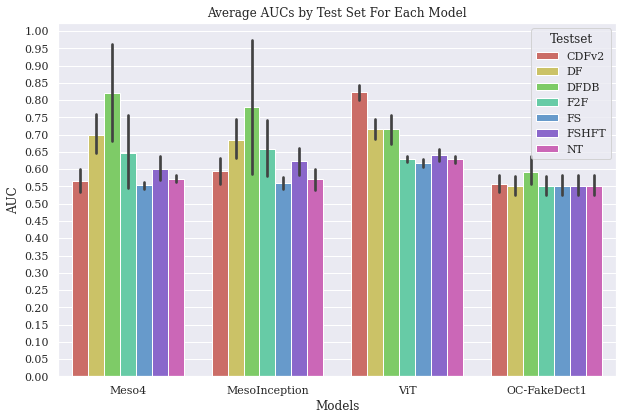

Model_AUCs


In [167]:
plt.figure(figsize=(10, 6.5))
# plot_order = df.groupby('Cause Name')['Deaths'].sum().sort_values(ascending=False).index.values
ax = sns.barplot(
    x="Model_Name",
    y="AUC",
    hue="Testset",
    data=df,
    hue_order=['CDFv2', 'DF', 'DFDB', 'F2F', 'FS', 'FSHFT', 'NT'],
    order=['Meso4', 'MesoInception', 'ViT', 'OC-FakeDect1'],
    palette="hls",
)
title = f"Average AUCs by Test Set For Each Model"
fname = "Model_AUCs"
ax.set_title(title)
ax.set_yticks(np.arange(0, 1.05, 0.05))
ax.set_xlabel("Models")
plt.savefig(
    f"./_PLOTS/{fname}.pdf", 
    bbox_inches="tight",
    )
plt.show()
print(fname)


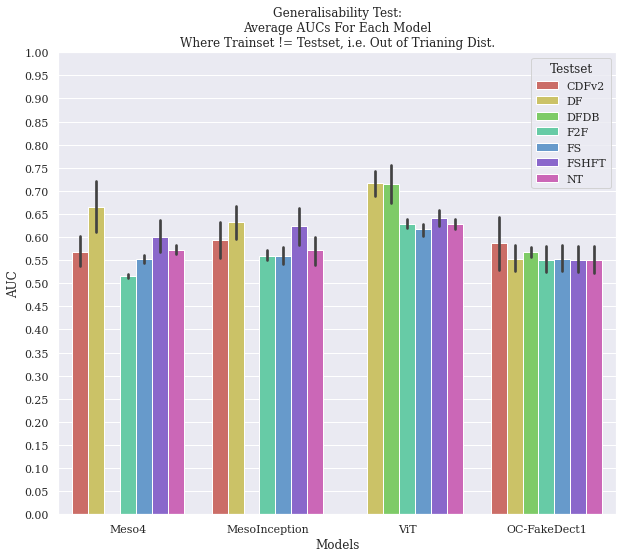

Model_AUC_Gen


In [143]:
plt.figure(figsize=(10, 8.5))
ax = sns.barplot(
    x="Model_Name",
    y="AUC",
    hue="Testset",
    data=best_gen_models,
    hue_order=['CDFv2', 'DF', 'DFDB', 'F2F', 'FS', 'FSHFT', 'NT'],
    order=['Meso4', 'MesoInception', 'ViT', 'OC-FakeDect1'],
    palette="hls",
)
title = f"Average AUCs by Test Set Split by Train-Test Set Pre-Processing Protocol For Each Model"
title = f"Generalisability Test:\nAverage AUCs For Each Model\nWhere Trainset != Testset, i.e. Out of Trianing Dist."
fname = "Model_AUC_Gen"
ax.set_title(title)
ax.set_yticks(np.arange(0, 1.05, 0.05))
ax.set_xlabel("Models")
plt.savefig(
    f"./_PLOTS/{fname}.pdf", 
    bbox_inches="tight",
    )
plt.show()
print(fname)


### Pre-Processing

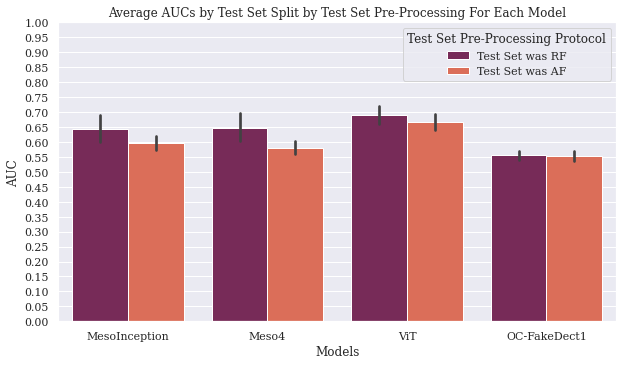

Model_AUCs_byTestPreProc


In [165]:
plt.figure(figsize=(10, 5.5))
ax = sns.barplot(
    x="Model_Name", 
    y="AUC", 
    hue="is_AVG_Testset", 
    data=df, 
    palette="rocket")
title = f"Average AUCs by Test Set Split by Test Set Pre-Processing For Each Model"
fname = "Model_AUCs_byTestPreProc"
ax.set_title(title)
ax.set_yticks(np.arange(0, 1.05, 0.05))
ax.set_xlabel("Models")
ax.legend(
    handles=ax.legend_.legendHandles,
    labels=["Test Set was RF", "Test Set was AF"],
    loc="upper right",
    title=f"Test Set Pre-Processing Protocol",
)
plt.savefig(
    f"./_PLOTS/{fname}.pdf", 
    bbox_inches="tight",
    )
plt.show()
print(fname)


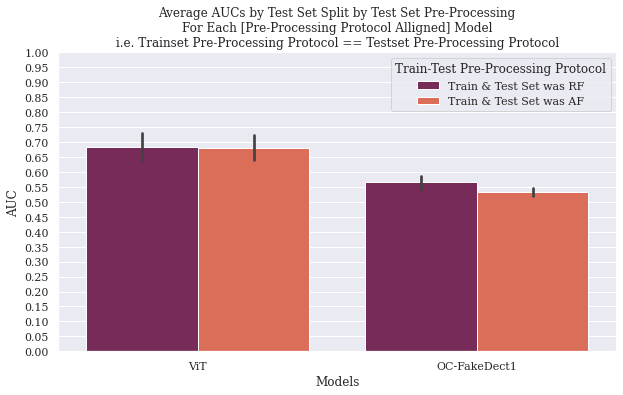

Model_AUCs_byTestPreProc_PreProcAllign


In [164]:
s1 = df.loc[(df["is_AVG_Testset"] == 1) & (df["is_AVG_Trainset"] == 1)]
s2 = df.loc[
    (df["is_AVG_Testset"] == 0)
    & (df["is_AVG_Trainset"] == 0)
    & (df["Model_Name"] != "Meso4")
    & (df["Model_Name"] != "MesoInception")
]

plt.figure(figsize=(10, 5.5))
ax = sns.barplot(
    x="Model_Name",
    y="AUC",
    hue="is_AVG_Testset",
    data=pd.concat([s1, s2]),
    palette="rocket",
)
title = f"Average AUCs by Test Set Split by Test Set Pre-Processing\nFor Each [Pre-Processing Protocol Alligned] Model\ni.e. Trainset Pre-Processing Protocol == Testset Pre-Processing Protocol"
fname = "Model_AUCs_byTestPreProc_PreProcAllign"
ax.set_title(title)
ax.set_yticks(np.arange(0, 1.05, 0.05))
ax.set_xlabel("Models")
ax.legend(
    handles=ax.legend_.legendHandles,
    labels=["Train & Test Set was RF", "Train & Test Set was AF"],
    loc="upper right",
    title=f"Train-Test Pre-Processing Protocol",
)
plt.savefig(
    f"./_PLOTS/{fname}.pdf", 
    bbox_inches="tight",
    )
plt.show()
print(fname)


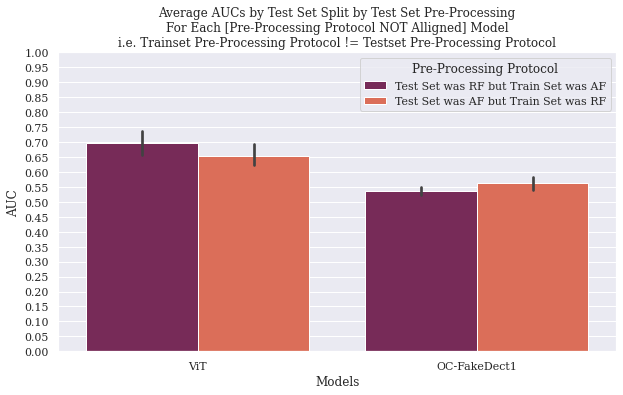

Model_AUCs_byTestPreProc_PreProcNOTAllign


In [163]:
s1 = df.loc[
    (df["is_AVG_Testset"] == 1) 
    & (df["is_AVG_Trainset"] == 0)
    & (df["Model_Name"] != "Meso4")
    & (df["Model_Name"] != "MesoInception")]
s2 = df.loc[
    (df["is_AVG_Testset"] == 0)
    & (df["is_AVG_Trainset"] == 1)
    & (df["Model_Name"] != "Meso4")
    & (df["Model_Name"] != "MesoInception")
]

plt.figure(figsize=(10, 5.5))
ax = sns.barplot(
    x="Model_Name",
    y="AUC",
    hue="is_AVG_Testset",
    data=pd.concat([s1, s2]),
    palette="rocket",
)
title = f"Average AUCs by Test Set Split by Test Set Pre-Processing\nFor Each [Pre-Processing Protocol NOT Alligned] Model\ni.e. Trainset Pre-Processing Protocol != Testset Pre-Processing Protocol"
fname = "Model_AUCs_byTestPreProc_PreProcNOTAllign"
ax.set_title(title)
ax.set_yticks(np.arange(0, 1.05, 0.05))
ax.set_xlabel("Models")
ax.legend(
    handles=ax.legend_.legendHandles,
    labels=["Test Set was RF but Train Set was AF", "Test Set was AF but Train Set was RF"],
    loc="upper right",
    title=f"Pre-Processing Protocol",
)
plt.savefig(
    f"./_PLOTS/{fname}.pdf", 
    bbox_inches="tight",
    )
plt.show()
print(fname)


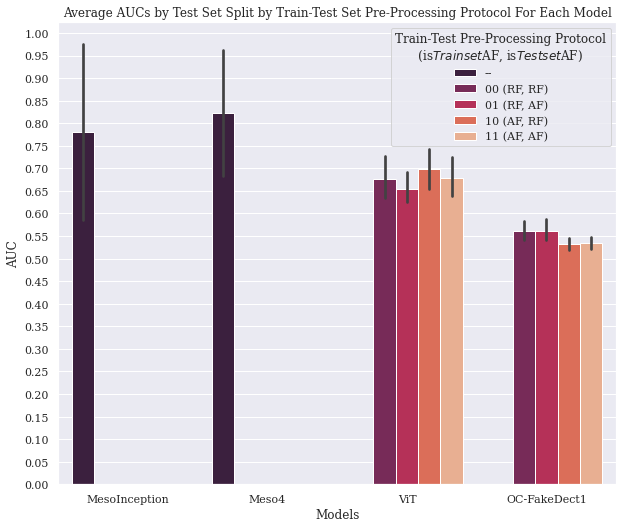

Model_AUC_byTestTrainPreProc


In [146]:
plt.figure(figsize=(10, 8.5))
dfx = df.copy()
dfx.loc[dfx["Testset"] == "DFDB", "is_RAE"] = "-"
dfx.loc[dfx["Testset"] == "DFDB", "is_AVG_Testset"] = "-"
dfx.loc[(dfx["Trainset"] == "F2F") & (dfx["Model_Name"] == "Meso4"), "is_AVG_Trainset"] = "-"
dfx.loc[(dfx["Trainset"] == "F2F") & (dfx["Model_Name"] == "MesoInception"), "is_AVG_Trainset"] = "-"
dfx.loc[(dfx["Trainset"] == "DF") & (dfx["Model_Name"] == "Meso4"), "is_AVG_Trainset"] = "-"
dfx.loc[(dfx["Trainset"] == "DF") & (dfx["Model_Name"] == "MesoInception"), "is_AVG_Trainset"] = "-"

dfx["is_AVG_Trainset + is_AVG_Testset"] = dfx["is_AVG_Trainset"].astype(str) + dfx["is_AVG_Testset"].astype(str)
ax = sns.barplot(
    x="Model_Name",
    y="AUC",
    hue="is_AVG_Trainset + is_AVG_Testset",
    data=dfx,
    hue_order=["--", "00", "01", "10", "11"],
    palette="rocket"
)
ax.legend(
    handles=ax.legend_.legendHandles,
    labels=["--", "00 (RF, RF)", "01 (RF, AF)", "10 (AF, RF)", "11 (AF, AF)"],
    loc="upper right",
    title=f"Train-Test Pre-Processing Protocol\n{' '*6}(is$Trainset$AF, is$Testset$AF)",
)
title = f"Average AUCs by Test Set Split by Train-Test Set Pre-Processing Protocol For Each Model"
fname = "Model_AUC_byTestTrainPreProc"
ax.set_title(title)
ax.set_yticks(np.arange(0, 1.05, 0.05))
ax.set_xlabel("Models")
plt.savefig(
    f"./_PLOTS/{fname}.pdf", 
    bbox_inches="tight",
    )
plt.show()
print(fname)


### Evaluation Method

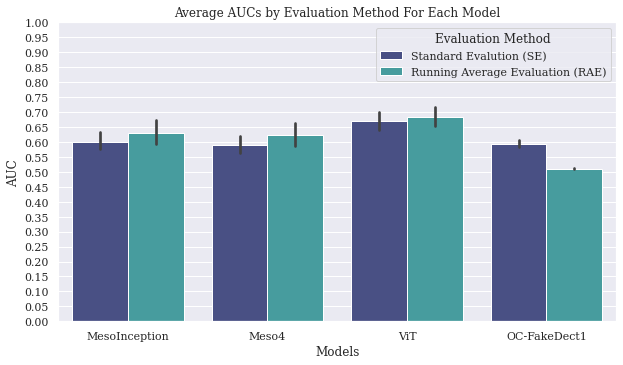

Model_AUC_byEvalMeth


In [240]:
dfx = df.copy()
# IGNORE DFDB 
# Since it skews: we can't do RAE on it
# (but we can do SE, so it's not fair?) 
# So remove rows w/ "DFDB" (i.e. this graph only considers the datapoints which are applicable)
dfx.loc[dfx["Testset"] == "DFDB", "is_RAE"] = "-"
dfx = dfx[~(dfx["is_RAE"] == "-")]

plt.figure(figsize=(10, 5.5))
ax = sns.barplot(
    x="Model_Name",
    y="AUC",
    hue="is_RAE",
    data=dfx,
    hue_order=[0, 1],
    palette="mako"
)
ax.legend(
    handles=ax.legend_.legendHandles, 
    labels=['Standard Evalution (SE)', 
            'Running Average Evaluation (RAE)'],
    title="Evaluation Method"
    )
title = f"Average AUCs by Evaluation Method For Each Model"
fname = "Model_AUC_byEvalMeth"
ax.set_title(title)
ax.set_yticks(np.arange(0, 1.05, 0.05))
ax.set_xlabel("Models")
plt.savefig(
    f"./_PLOTS/{fname}.pdf", 
    bbox_inches="tight",
    )
plt.show()
print(fname)


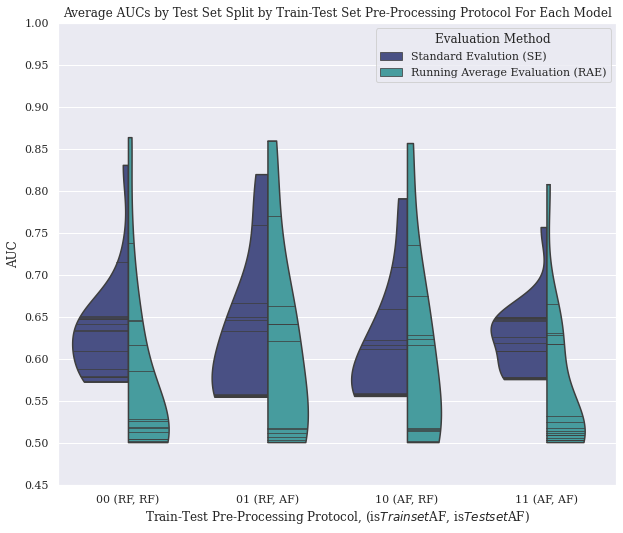

Model_AUC_byTestTrainPreProc


In [232]:
plt.figure(figsize=(10, 8.5))
dfx = df.copy()
# IGNORE DFDB 
# Since it skews: it's not actually RF and we can't do RAE on it
# (but we can do SE, so it's not fair?) 
# So remove rows w/ "DFDB" (i.e. this graph only considers the datapoints which are applicable)
dfx.loc[dfx["Testset"] == "DFDB", "is_RAE"] = "-"
dfx.loc[dfx["Testset"] == "DFDB", "is_AVG_Testset"] = "-"
dfx.loc[(dfx["Trainset"] == "F2F") & (dfx["Model_Name"] == "Meso4"), "is_AVG_Trainset"] = "-"
dfx.loc[(dfx["Trainset"] == "F2F") & (dfx["Model_Name"] == "MesoInception"), "is_AVG_Trainset"] = "-"
dfx.loc[(dfx["Trainset"] == "DF") & (dfx["Model_Name"] == "Meso4"), "is_AVG_Trainset"] = "-"
dfx.loc[(dfx["Trainset"] == "DF") & (dfx["Model_Name"] == "MesoInception"), "is_AVG_Trainset"] = "-"
dfx = dfx[~(dfx["is_AVG_Trainset"] == "-")]
dfx = dfx[~(dfx["is_AVG_Testset"] == "-")]
dfx = dfx[~(dfx["is_RAE"] == "-")]
dfx["is_AVG_Trainset + is_AVG_Testset"] = dfx["is_AVG_Trainset"].astype(str) + dfx["is_AVG_Testset"].astype(str)

ax = sns.violinplot(
    x="is_AVG_Trainset + is_AVG_Testset",
    y="AUC",
    hue="is_RAE",
    data=dfx,
    # hue_order=["--", "00", "01", "10", "11"],
    inner="stick",
    split=True, 
    cut=0,  
    palette="mako",
    aspect=1,
    height=100,
)
ax.legend(
    handles=ax.legend_.legendHandles, 
    labels=['Standard Evalution (SE)', 
    'Running Average Evaluation (RAE)'],
    title="Evaluation Method"
    )
title = f"Average AUCs by Test Set Split by Train-Test Set Pre-Processing Protocol For Each Model"
fname = "Model_AUC_byTestTrainPreProc"
ax.set_title(title)
ax.set_xticklabels(["00 (RF, RF)", "01 (RF, AF)", "10 (AF, RF)", "11 (AF, AF)"],)
ax.set_yticks(np.arange(0.45, 1.025, 0.05))
ax.set_xlabel(f"Train-Test Pre-Processing Protocol, (is$Trainset$AF, is$Testset$AF)")
# plt.savefig(
#     f"./_PLOTS/{fname}.pdf", 
#     bbox_inches="tight",
#     )
plt.show()
print(fname)


### Pre-Processing vs Evaluation Method

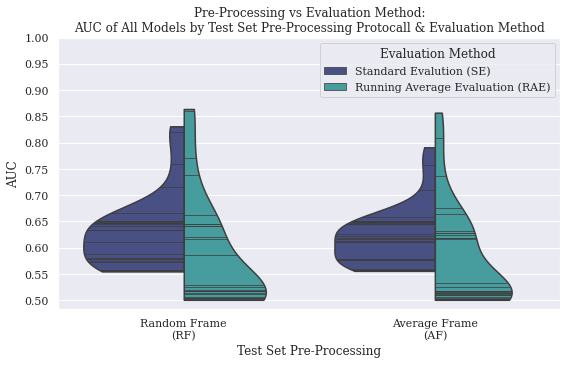

Violin_PreProc_VS_EvalMeth


In [237]:
dfx = df.copy()
# IGNORE DFDB 
# Since it skews: it's not actually RF and we can't do RAE on it
# (but we can do SE, so it's not fair?) 
# So remove rows w/ "DFDB" (i.e. this graph only considers the datapoints which are applicable)
dfx.loc[dfx["Testset"] == "DFDB", "is_RAE"] = "-"
dfx.loc[dfx["Testset"] == "DFDB", "is_AVG_Testset"] = "-"
dfx.loc[(dfx["Trainset"] == "F2F") & (dfx["Model_Name"] == "Meso4"), "is_AVG_Trainset"] = "-"
dfx.loc[(dfx["Trainset"] == "F2F") & (dfx["Model_Name"] == "MesoInception"), "is_AVG_Trainset"] = "-"
dfx.loc[(dfx["Trainset"] == "DF") & (dfx["Model_Name"] == "Meso4"), "is_AVG_Trainset"] = "-"
dfx.loc[(dfx["Trainset"] == "DF") & (dfx["Model_Name"] == "MesoInception"), "is_AVG_Trainset"] = "-"
dfx = dfx[~(dfx["is_AVG_Trainset"] == "-")]
dfx = dfx[~(dfx["is_AVG_Testset"] == "-")]
dfx = dfx[~(dfx["is_RAE"] == "-")]

plt.figure(figsize=(9,5))
ax = sns.violinplot(
    x="is_AVG_Testset", 
    y='AUC', 
    hue="is_RAE", 
    data=dfx, 
    inner="stick",
    split=True, 
    cut=0,  
    palette="mako",
    aspect=1,
    height=100,
    )
title = f"Pre-Processing vs Evaluation Method:\nAUC of All Models by Test Set Pre-Processing Protocall & Evaluation Method"
fname = "Violin_PreProc_VS_EvalMeth"
ax.set_title(title)
ax.set_xticklabels([
    "Random Frame\n(RF)", 
    "Average Frame\n(AF)",
    ])
ax.legend(
    handles=ax.legend_.legendHandles, 
    labels=['Standard Evalution (SE)', 
    'Running Average Evaluation (RAE)'],
    title="Evaluation Method"
    )
ax.set_xlabel("Test Set Pre-Processing")
ax.set_ylabel("AUC")
ax.set_yticks(np.arange(0.5, 1.05, 0.05));
plt.savefig(
    f"./_PLOTS/{fname}.pdf", 
    bbox_inches="tight"
    )
plt.show()
print(fname)

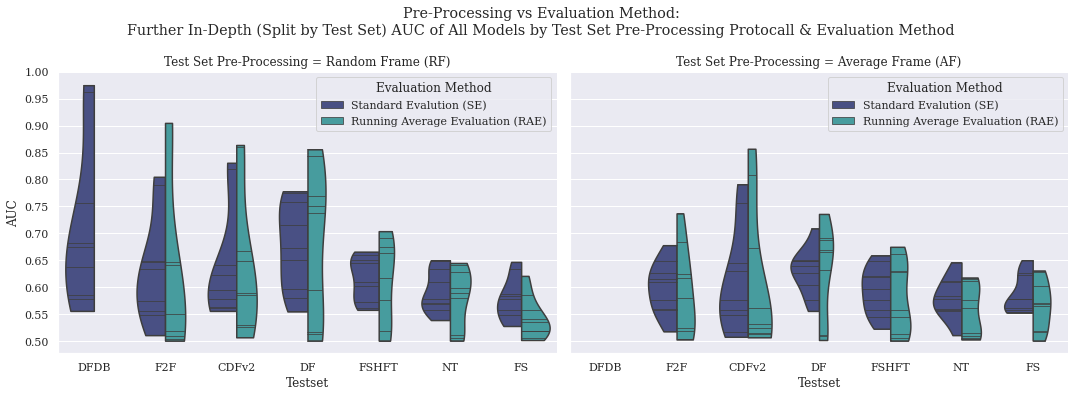

In [151]:
ax = sns.catplot(
    x="Testset",
    y="AUC",
    hue="is_RAE",
    col="is_AVG_Testset",
    data=df,
    kind="violin",
    split=True,
    height=5,
    aspect=3 / 2,
    palette="mako",
    cut=0,
    inner="stick",
    legend_out=False,
)
ax.fig.suptitle(
    f"Pre-Processing vs Evaluation Method:\nFurther In-Depth (Split by Test Set) AUC of All Models by Test Set Pre-Processing Protocall & Evaluation Method",
    y=1.1,
    fontdict={"weight": "bold"},
)
ax.axes[0][0].set_title(f"Test Set Pre-Processing = Random Frame (RF)")
ax.axes[0][1].set_title(f"Test Set Pre-Processing = Average Frame (AF)")
ax, bx = ax.axes[0][0], ax.axes[0][1]
bx.legend()
bx.legend(
    handles=bx.legend_.legendHandles,
    labels=["Standard Evalution (SE)", "Running Average Evaluation (RAE)"],
    loc="best",
    title="Evaluation Method",
)
ax.legend(
    handles=bx.legend_.legendHandles,
    labels=["Standard Evalution (SE)", "Running Average Evaluation (RAE)"],
    loc="best",
    title="Evaluation Method",
)
ax.set_yticks(np.arange(0.5, 1.05, 0.05))
plt.savefig(
    "./_PLOTS/Pre-Processing vs Evaluation Method by Test Set.pdf", bbox_inches="tight"
)
plt.show()


<br><br>
___
## Misc

In [ ]:
best_models


In [ ]:
sns.violinplot(x="is_RAE", y="AUC", hue="is_RAE", data=df, inner="stick", cut=0)


In [ ]:
# vit_df = best_df[best_df["Model_Name"].isin(["ViT"])].sort_values(by=["AUC", "F1", "Precision", "Recall"], ascending=[False]*4)
# vit_df

# rae vs non-rae
vit_rae = best_vits[best_vits["Testset"].str.contains("rae")]
vit_nonrae = best_vits[~best_vits["Testset"].str.contains("rae")]
vit_nonrae = vit_nonrae[~vit_nonrae["Testset"].str.contains("DFDB")]  # no eq lens

# ttest_rel assumes relationship, and not eqal var
vit_raeVnonrae_pvalue = ttest_rel(
    vit_rae["AUC"], vit_nonrae["AUC"], alternative="greater"
)[1]
# p<0.05 means not alternative (vit_rae['AUC'] > vit_nonrae['AUC'])

data1 = vit_rae[["AUC"]].assign(RAE=1)
data2 = vit_nonrae[["AUC"]].assign(RAE=0)

cdf = pd.concat([data1, data2])
mdf = pd.melt(cdf, id_vars=["RAE"], var_name=["AUC"])

# LOOK AT https://seaborn.pydata.org/generated/seaborn.violinplot.html
ax = sns.violinplot(
    x="RAE", y="value", hue="RAE", data=mdf, inner="stick", cut=0
)  # , split=True)
ax.set_title(
    f"ViT AUCs for Standard Evalution vs Running Average Evaluation\n2-Tailed T-Test w/ Alternative Hypethesis (RAE>SE)\np-value = {vit_raeVnonrae_pvalue:.4f} $\\rightarrow$ Accept Alternative Hypethesis "
)
ax.set_xticklabels(["Standard Evalution (SE)", "Running Average Evaluation (RAE)"])
ax.set_xlabel("Evaluation Method")
ax.set_ylabel("AUC")
ax.get_legend().remove()
plt.show()


In [ ]:
ax = sns.violinplot(
    x="Model_Name",
    y="AUC",
    hue="is_RAE",
    data=df,
    inner="stick",
    cut=0,
    split=True,
    scale="width",
)


In [ ]:
vit_df = best_df[best_df["Model_Name"].isin(["ViT"])].sort_values(
    by=["AUC", "F1", "Precision", "Recall"], ascending=[False] * 4
)
# vit_df

# rae vs non-rae
vit_rae = vit_df[vit_df["Testset"].str.contains("rae")]
vit_nonrae = vit_df[~vit_df["Testset"].str.contains("rae")]
vit_nonrae = vit_nonrae[~vit_nonrae["Testset"].str.contains("DFDB")]  # no eq lens

# ttest_rel assumes relationship, and not eqal var
vit_raeVnonrae_pvalue = ttest_rel(
    vit_rae["AUC"], vit_nonrae["AUC"], alternative="greater"
)[1]
# p<0.05 means not alternative (vit_rae['AUC'] > vit_nonrae['AUC'])

data1 = vit_rae[["AUC"]].assign(RAE=1)
data2 = vit_nonrae[["AUC"]].assign(RAE=0)

cdf = pd.concat([data1, data2])
mdf = pd.melt(cdf, id_vars=["RAE"], var_name=["AUC"])

# LOOK AT https://seaborn.pydata.org/generated/seaborn.violinplot.html
ax = sns.violinplot(
    x="RAE", y="value", hue="RAE", data=mdf, inner="stick", cut=0
)  # , split=True)
ax.set_title(
    f"ViT AUCs for Standard Evalution vs Running Average Evaluation\n2-Tailed T-Test w/ Alternative Hypethesis (RAE>SE)\np-value = {vit_raeVnonrae_pvalue:.4f} $\\rightarrow$ Accept Alternative Hypethesis "
)
ax.set_xticklabels(["Standard Evalution (SE)", "Running Average Evaluation (RAE)"])
ax.set_xlabel("Evaluation Method")
ax.set_ylabel("AUC")
ax.get_legend().remove()
plt.show()


In [ ]:
set(df["Testset"]), set(df["Trainset"])


In [ ]:
# rae vs non-rae by test_dataset
sns.violinplot(
    x="Testset", y="AUC", hue="is_RAE", data=df, split=True, cut=0, scale="width"
)  # , palette="Set1")


In [ ]:
# avg vs rnd
sns.violinplot(
    x="Testset",
    y="AUC",
    hue="is_AVG_Testset",
    data=df,
    inner="stick",
    split=True,
    cut=0,
    palette="Set1",
)


In [ ]:
# best models
best_df = df.sort_values(by=["AUC", "F1", "Precision", "Recall"], ascending=[False] * 4)
best_df.loc[
    best_df[["Testset"]].drop_duplicates().index
]  # top models by testset sorted by AUC


In [ ]:
# sns.violinplot(x="Model_Name", y='AUC', hue="is_RAE", data=df, inner="stick", split=True, width=1)
# sns.violinplot(x="Model_Name", y='AUC', hue="is_AVG_Testset", data=df, inner="stick", split=True)

ax1 = sns.violinplot(x="Testset", y="AUC", hue="is_RAE", data=df, split=True, cut=0)
ax2 = sns.violinplot(
    x="Testset",
    y="AUC",
    hue="is_AVG_Testset",
    data=df,
    split=True,
    cut=0,
    palette="Set3",
)  # , dodge=True)
plt.setp(ax2.collections, alpha=0.65)
plt.show()


In [ ]:
# testset is avg vs rae eval
sns.violinplot(
    x="is_AVG_Testset",
    y="AUC",
    hue="is_RAE",
    data=df,
    inner="stick",
    split=True,
    cut=0,
    palette="Set2",
)

sns.catplot(
    x="Testset",
    y="AUC",
    hue="is_RAE",
    col="is_AVG_Testset",
    data=df,
    kind="violin",
    split=True,
    height=10,
    aspect=1,
    palette="Set1",
    cut=0,
    inner="stick",
)
